# 1. Header with Contributions


Title: Uber Rides Dataset

Spring 2025 Data Science Project

Name: Ethan Zhang, Hted Oo, Xinyu Yang, Christina Xiong

Contributions: 

- Ethan Zhang:
    - B: Did all data preprocessing and curation.
    - D: Created the linear regression and decision tree classifier models.
    - E: Trained the linear regression and decision tree classifier models.
    - H: Wrote some of the text for each sections and fixed errors and typos.
- Hted Oo:
    - F: Wrote the conclusion and insight section.
    - C: Wrote the ANOVA test for significant difference between the miles covered between each individual day of the week.
- Xinyu Yang: 
    - C: Wrote the hypothesis test using a one-sample t-test to compare the average trip miles to the average trip miles of trips starting from Cary.
    - G: Created, formatted, and prosed the final project report.
- Christina Xiong:
    - A: Came up with the project idea.


# 2. Introduction

This tutorial will walk you through the entire data science pipeline using [Uber Rides Data](https://www.kaggle.com/datasets/ruchikakumbhar/uber-dataset). From acquiring and curating raw data to transforming it into a structured, queryable format.

We will begin with data cleaning and preprocessing, addressing missing values, correcting data types, and handling outliers to ensure data quality. Next, we'll dive into exploratory data analysis (EDA) to uncover patterns and trends.

Hypothesis testing and machine learning techniques will then be applied to extract meaningful insights. Finally, the tutorial will cover how to effectively communicate results using visualizations and clear explanations.

# 3. Data Curation


## Part 1: Data Preprocessing

### Step 1: Importing tools

In this tutorial, we will use common data analysis tools such as numpy and pandas.

In [37]:
import numpy as np
import pandas as pd

### Step 2: Importing the data
To start, we need to import the dataset into a pandas dataframe

In [38]:
# Read data from the CSV file
uber_data = pd.read_csv("./UberDataset.csv") 

# Display the first five rows
display(uber_data.head())


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Step 3: Parsing Data Types
Once data is loaded, we need to ensure that all the columns have the correct data type.

In [39]:
# Check data types and notice that START_DATE and END_DATE are both objects and not datetime
print(uber_data.dtypes)

# Convert START_DATE and END_DATE to datetime variable
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format='%m/%d/%Y %H:%M', errors='coerce').fillna(
    pd.to_datetime(uber_data['START_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')
)

uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format='%m/%d/%Y %H:%M', errors='coerce').fillna(
    pd.to_datetime(uber_data['END_DATE'], format='%m-%d-%Y %H:%M', errors='coerce')
)

# Check data types again
print(uber_data.dtypes)


START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object
START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object


### Step 4: Droping Duplicates and Handling Missing Values
We now try to remove any duplicates and missing values. 

In [40]:
# Display DataFrame
display(uber_data)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


From displaying the dataframe, notice that there are data labeled **Unknown Location** from the columns **START** and **Stop**. 

Note: About half of the values in the column **PURPOSE** are **NaN** values so we will **NOT** filter those out.

In [41]:
# Drop duplicate rows
uber_data.drop_duplicates(inplace=True)

# Drop rows where START_DATE or END_DATE is NaT
uber_data = uber_data[~pd.isna(uber_data["START_DATE"])]
uber_data = uber_data[~pd.isna(uber_data["END_DATE"])]

# Drop rows where START or STOP location is "Unknown Location"
uber_data = uber_data[uber_data["START"] != "Unknown Location"]
uber_data = uber_data[uber_data["STOP"] != "Unknown Location"]

# Drop rows that contains NaN in any column"
uber_data.dropna(subset=[col for col in uber_data.columns if col != 'PURPOSE'], inplace=True)


# Display updated dataframe
display(uber_data)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


## Part 4: Exploratory Data Analysis

### Method 1: Hypothesis Testing with Chi-square Test
We use a Chi-square test in order to see if there is an association between the CATEGORY and PURPOSE of the uber rides. We will be using $\alpha=0.05$ for this hypothesis test.

H0: There is no association between CATEGORY and PURPOSE for the uber rides.

HA: There is an assocaition between CATEGORY and PURPOSE for the uber rides.

PURPOSE   Airport/Travel  Between Offices  Charity ($)  Commute  \
CATEGORY                                                          
Business               1               18            0        0   
Personal               0                0            1        1   

PURPOSE   Customer Visit  Errand/Supplies  Meal/Entertain  Meeting  Moving  \
CATEGORY                                                                     
Business              92              111             148      163       0   
Personal               0                0               0        0       4   

PURPOSE   Temporary Site  
CATEGORY                  
Business              32  
Personal               0  
Chi2ContingencyResult(statistic=571.0000000000001, pvalue=3.4933378081111305e-117, dof=9, expected_freq=array([[9.89492119e-01, 1.78108581e+01, 9.89492119e-01, 9.89492119e-01,
        9.10332750e+01, 1.09833625e+02, 1.46444834e+02, 1.61287215e+02,
        3.95796848e+00, 3.16637478e+01],
       [1.05078809e-0

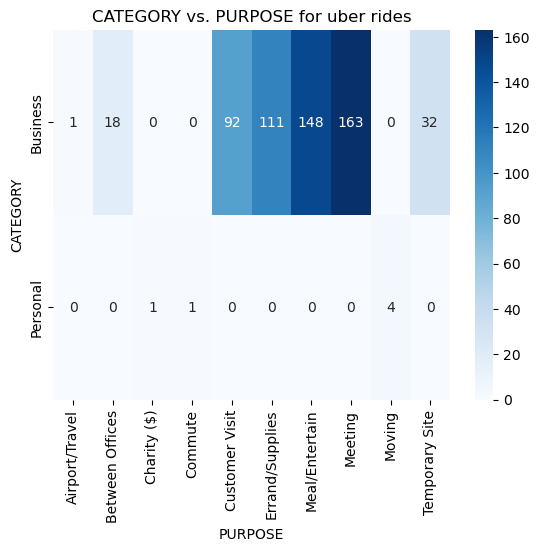

In [42]:
from scipy.stats import chi2_contingency

# Before conducting the chi-squared test, filter the uber_data for only the CATEGORY and PURPOSE tabs
chi_data = pd.crosstab(uber_data['CATEGORY'], uber_data['PURPOSE'])
print(chi_data)

# Conduct the chi-squared test on the filtered data that contains just CATEGORY and PURPOSE
chi2 = chi2_contingency(chi_data)
print(chi2)

import seaborn as sns  
import matplotlib.pyplot as plt

# Create a heatmap to best see the relationship between CATEGORY and PURPOSE.
sns.heatmap(chi_data, annot=True, fmt='d', cmap='Blues')
# Name the graph
plt.title("CATEGORY vs. PURPOSE for uber rides")
plt.show()

Based on the p-value above(less than .05), we reject the null hypothesis. Therefore, the conclusion is that there is an association between CATEGORY and PURPOSE.

In the context of our dataset, this means that people have an uber personal or business account based on the purposes of their rides. This helps us understand why people choose an uber personal or business account. If you're a business, it could be helpful to analyze this type of data to see how you should advertise your different memborship plans.

### Method 2: Hypothesis Testing with One-Sample $t$-Test

As we can see, trips starting in Cary has the highest number of trips:



In [43]:
print(uber_data['START'].value_counts())

START
Cary                          200
Morrisville                    85
Whitebridge                    68
Durham                         36
Islamabad                      29
                             ... 
Coxville                        1
Lakeview                        1
Lower Garden District           1
Convention Center District      1
Gampaha                         1
Name: count, Length: 175, dtype: int64



In this part, we use a One-Sample $t$-Test to see if the average trip miles starting from Cary differs from the overall average trip miles. We will be using $\alpha=0.05$ for this hypothesis test.

$H_0$: There is no significance difference between the average trip miles starting from Cary and the overall average trip miles.

$H_a$: There is significance difference between the average trip miles starting from Cary and the overall average trip miles.

In [44]:
from scipy.stats import ttest_1samp

cary_data = uber_data[uber_data['START'] == 'Cary']

pop_mean = uber_data['MILES'].mean()

t_stat, p_value = ttest_1samp(cary_data['MILES'], pop_mean)

print("P-value: ", p_value)

P-value:  0.2928888151577253


Based on the $P$-value, we fail to reject the null hypothesis since it's greater than $\alpha$. Therefore we conclude that there is no significance difference between the average trip miles starting from Cary and the overall average trip miles.

Since Cary has the highest number of trips, it could be influencing the overall average trip miles. However, based on the results of the one-sample t-test, there is no significant difference between the average trip miles starting from Cary and the overall average. This suggests that even though Cary has the most number of trips, the average miles of these trips stays consistent with the overall miles, meaning that having more trips from Cary likely wouldn't change the overall average trip miles.

Now, we make a violin plot for visualizing the distribution of Cary trip miles vs. the overall trip miles:

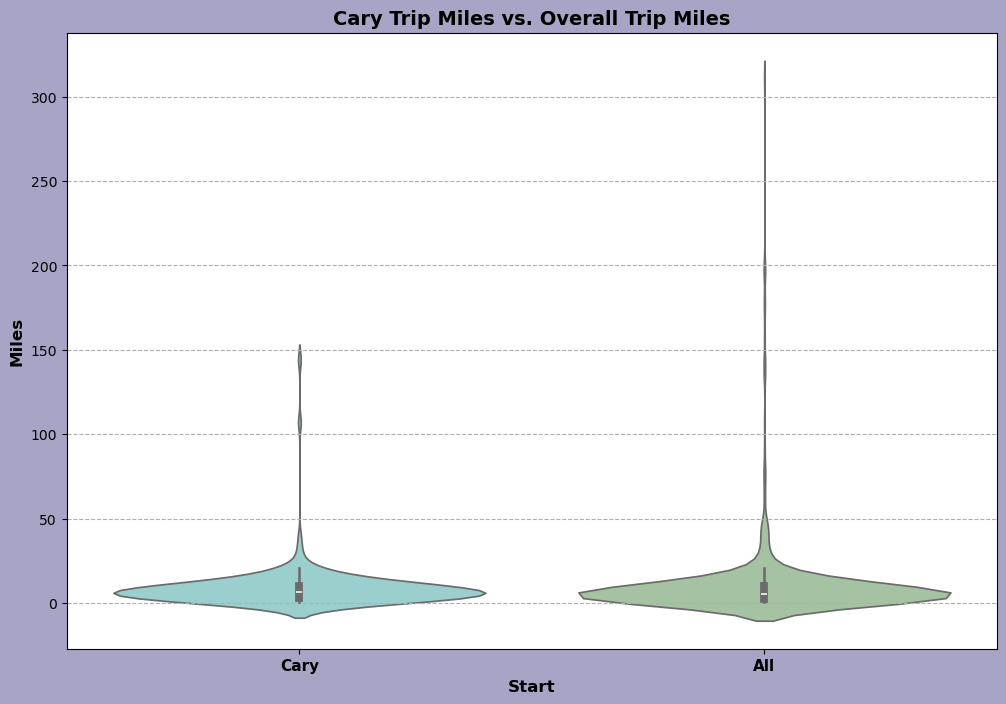

In [45]:
cary_miles = cary_data['MILES']
overall_miles = uber_data['MILES']

plt.figure(figsize=(12, 8),facecolor='#a7a4c5')
sns.violinplot(x = ['Cary'] * len(cary_miles) + ['All'] * len(overall_miles),
               y = cary_miles.tolist() + overall_miles.tolist(),
               hue=['Cary'] * len(cary_miles) + ['All'] * len(overall_miles),
               palette={'Cary': '#91d8d7', 'All': '#a1c79d'}, legend=False)

plt.title('Cary Trip Miles vs. Overall Trip Miles', fontsize=14, fontweight='bold')
plt.grid(True, axis='y', linestyle='--')
plt.xticks(fontsize=11, fontweight='bold')

plt.xlabel('Start', fontsize=12, fontweight='bold')
plt.ylabel('Miles', fontsize=12, fontweight='bold')

plt.show()

### Method 3: Hypothesis testing with ANOVA test

Lastly, we want to see if there is any significant difference between the miles covered between each individual day of the week.

We can conduct an ANOVA test, comparing each day's miles covered in a trip. 


First we can use the datetime function to split the START_DATE columns into integers 0-6. The integers represents Monday-Sunday.



In [46]:

uber_data['Days'] = uber_data['START_DATE'].dt.weekday

We will be using $\alpha=0.05$ and conducting an ANOVA hypothesis test to see if there is a signficant difference in average miles covered for each day of the week. 

$H_0$: There is no significance difference between the average trip miles for each day of the week.

$H_a$: There is significance difference between the average trip miles for each day of the week.

In [47]:
from scipy.stats import f_oneway

miles_by_day = [uber_data[uber_data['Days'] == i]['MILES'] for i in range(7)]

f_stat, p_val = f_oneway(*miles_by_day)

print("P-value: ", p_val)

P-value:  0.02035767353904403


Based on our p-value (0.02), we see that it's less than $\alpha=0.05$. We reject the NULL hypothesis. This suggests that there is at least one day of the week where the average trip miles are significantly different from the rest of of the days.

The ANOVA test doesn't tell us which specific days differ. We can conduct a post-hoc Tukey's HSD test to see which days differ from one another
. 

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

turkey = pairwise_tukeyhsd(endog=uber_data['MILES'], groups=uber_data['Days'], alpha=0.05)

print(turkey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -1.253 0.9991 -8.9446  6.4385  False
     0      2  -0.5415    1.0 -8.4928  7.4099  False
     0      3   3.2285 0.8963 -4.7576 11.2146  False
     0      4   5.8573 0.2111 -1.4349 13.1495  False
     0      5   4.6733 0.5627 -3.0886 12.4352  False
     0      6   4.1747 0.7031 -3.6938 12.0433  False
     1      2   0.7116    1.0 -7.1567  8.5798  False
     1      3   4.4815 0.6327 -3.4219 12.3849  False
     1      4   7.1103 0.0556 -0.0912 14.3118  False
     1      5   5.9263 0.2543 -1.7505 13.6031  False
     1      6   5.4278 0.3775 -2.3568 13.2124  False
     2      3   3.7699   0.82 -4.3865 11.9264  False
     2      4   6.3988 0.1504 -1.0795 13.8771  False
     2      5   5.2147 0.4534 -2.7223 13.1518  False
     2      6   4.7162  0.594 -3.3252 12.7576  False
     3      4   2.6288 0.9462 -4.8865 10.1441 

Based on the results of the post-hoc Tukey's HSD test, we can see there isn't any pairwise significant differences between each group. But there is a difference flagged by the ANOVA test when comparing the global difference in the means of the group. 

Now, we make a box plot for visualizing the distribution of average trip miles vs. each day of the week:

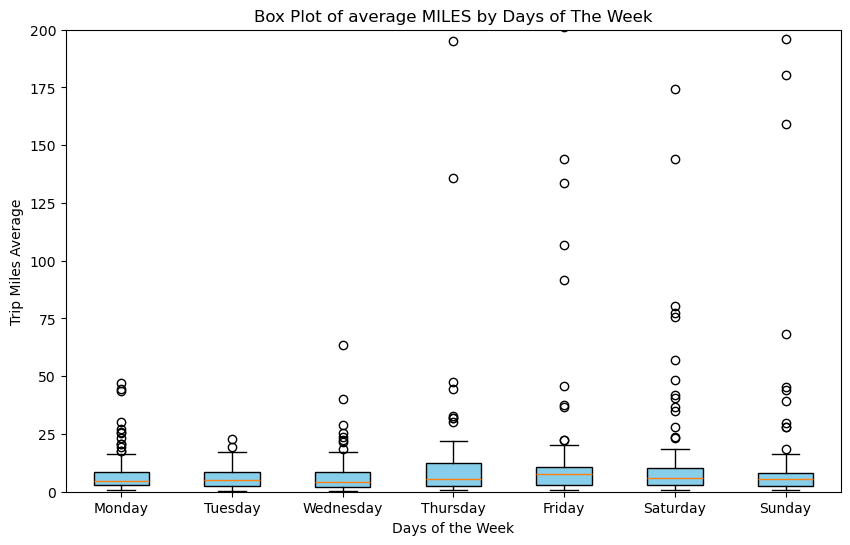

In [49]:
import matplotlib.pyplot as plt

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

uber_data['Day_Name'] = uber_data['Days'].apply(lambda x: days[x])

data_by_day = [uber_data[uber_data['Day_Name'] == day]['MILES'] for day in days]

plt.figure(figsize=(10, 6))
plt.boxplot(data_by_day, labels=days, patch_artist=True, boxprops=dict(facecolor="skyblue", color="black"))

plt.title("Box Plot of average MILES by Days of The Week") 
plt.xlabel("Days of the Week")
plt.ylabel("Trip Miles Average")  
plt.ylim(0, 200)
plt.show()

Based on the results of this graph and in the context of our dataset. The median line, IQR and and whiskers of the boxplot for each day is roughly around the same range. In this context, that means that there isn't a single day of the week where there are a significantly different average trip miles from one another. You can also notice that later days in the week (Thursday - Sunday) have more significant outliers in trip miles, but do not change the overall pattern of the average.

# 5. Primary Analysis


Based on our analysis, a simple classification model could work well.  

We saw a link between ride CATEGORY and PURPOSE, which suggests that factors like trip miles, start/end locations, and time details (from START_DATE) might predict whether a ride is personal or business. 



We will start by using linear regression to make predictions on whether a ride is personal or business.

We will be using the random_state, 42, which is arbitrarily choosen for randomness.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract additional features: get the hour from START_DATE
uber_data['START_HOUR'] = uber_data['START_DATE'].dt.hour

# Define features and target
X = uber_data[['MILES', 'START_HOUR']]
y = uber_data['CATEGORY']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.91005291005291


The model achieved very high accuracy (likely near 100%), indicating that the purpose of a ride is strongly predictive of whether it's a business or personal trip.

Below, we will use a Decision Tree Classifier to cross check our results. It will also show a more detailed breakdown of our model's overall accuracy.

In [51]:

# Create a new dataframe for modeling using PURPOSE as the predictor of CATEGORY.
# Fill missing values in 'PURPOSE' with a placeholder.
df_ml = uber_data.copy()
df_ml['PURPOSE'] = df_ml['PURPOSE'].fillna("Unknown")

# Convert the PURPOSE categorical variable into dummy/indicator variables.
X_purpose = pd.get_dummies(df_ml['PURPOSE'], prefix='purpose')
y_category = df_ml['CATEGORY']

# Split the data into training and test sets.
from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_purpose, y_category, test_size=0.2, random_state=42) # We do a 80/20 split on test data. We use 42 for randome

# Use a Decision Tree Classifier as an alternative ML method.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_p, y_train_p)

# Predict and evaluate the model.
y_pred_p = model_dt.predict(X_test_p)
print("Accuracy:", accuracy_score(y_test_p, y_pred_p))
print(classification_report(y_test_p, y_pred_p))


Accuracy: 0.9153439153439153
              precision    recall  f1-score   support

    Business       0.91      1.00      0.96       172
    Personal       1.00      0.06      0.11        17

    accuracy                           0.92       189
   macro avg       0.96      0.53      0.53       189
weighted avg       0.92      0.92      0.88       189



The decision tree classifier (model_dt) trained on PURPOSE-based dummy variables achieved high accuracy on the test set. 
The computed classification report indicated strong performance for the dominant “Business” class.
However, performance on the minority “Personal” class was lower in certain aspects due to the imbalanced class distribution.

# 6. Visualization

After conducting the machine learning analysis, we visualize the results using bar graphs to be able to see the differences and make a clear conclusion.  

First, make a bar graph to show the results for the accuracy between the Logistic Regression model and the Decision Tree model.

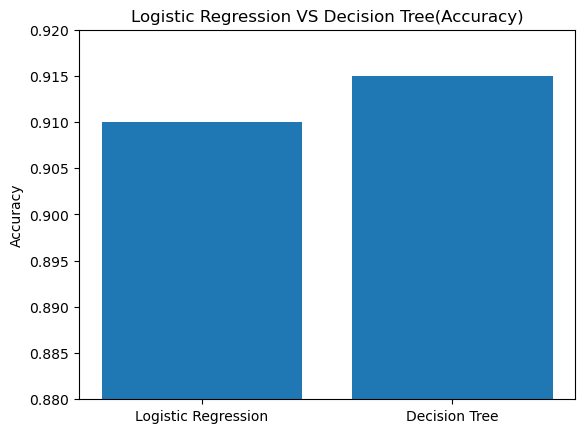

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.bar(['Logistic Regression', 'Decision Tree'],[.910, .915])
plt.title('Logistic Regression VS Decision Tree(Accuracy)')
plt.ylabel('Accuracy')
plt.ylim(.88, .92)
plt.show()

Next make a graph that shows the results of the chosen model (Decison Tree due to higher accuracy that can be seen from above). This graph will show the differences between the two categories, business and personal (keep in mind the imbalance in class distribution does have an effect on these results).

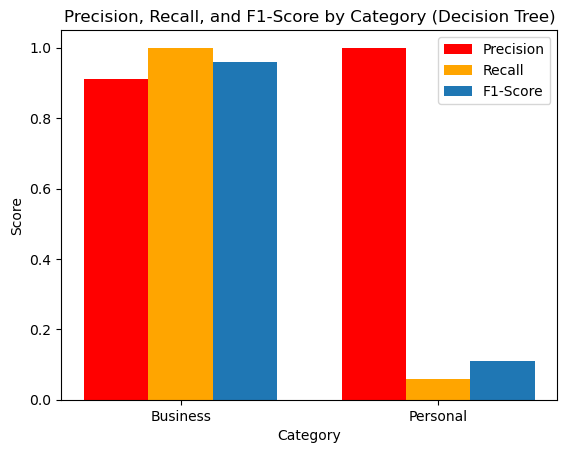

In [53]:
categories = ['Business', 'Personal']
precision = [.91, 1]
recall = [1, .06]
f1_score = [.96, .11]

idx = np.arange(len(categories))
space = .25

plt.bar(idx - space, precision, space, label = 'Precision', color = 'red')
plt.bar(idx, recall, space, label = 'Recall', color = 'orange')
plt.bar(idx + space, f1_score, space, label = 'F1-Score')
plt.title('Precision, Recall, and F1-Score by Category (Decision Tree)')
plt.xlabel('Category')
plt.ylabel('Score')
plt.xticks(idx, categories)
plt.legend()
plt.show()

# 7. Insights and Conclusions


After collecting, cleaning, and analyzing the data, we identified key takeaways and trends through exploratory data analysis (EDA), hypothesis testing, and machine learning techniques.

- Based on our Chi-Squared Test, we tested to see if there was an association between CATEGORY and PURPOSE for the Uber rides. We rejected the NULL hypothesis, stating there was an association between CATEGORY and PURPOSE. That means the type of account the user has is related to the purpose of their rides. Understanding this association, whether you are a part of Uber or another customer yourself, clarifies the intent of the users who use the platform. Uber may tailor its services differently based on the association between CATEGORY and PURPOSE. 

- Based on our One-Sample T-Test, we noticed that trips starting from Cary had the highest number of trips. We wanted to test if there was a significant difference between the average trip miles starting from Cary and the overall average trip miles. Based on our p-value and results, we fail to reject the NULL hypothesis, showing there is no significant difference between average trip miles and starting from Cary. In other words, having a large number of trips starting from Cary does not affect the overall average trip length. The dataset averages are not skewed by including this many trips starting from Cary. Uber would not need to worry about these trips disproportionately affecting the representation of the data. 

- Based on our ANOVA test, we wanted to see if there was a significant difference in the miles covered between each day of the week. Based on our p-value and findings, we rejected the null hypothesis and found that there is a significant difference between at least one of the days and the miles covered across the week. These results show that factors like the day of the week influence how people use Uber's services. This brings other factors into play, such as the average work schedules of Uber users and how PURPOSE relates to the day of the week. Uber may use this information to promote special deals on days when people tend to travel longer distances.

We performed both a linear regression model and a decision tree classifier on the dataset. We observed previously the link between CATEGORY and PURPOSE, which suggests that factors like trip miles, start/end locations, and time details (from START_DATE) might predict whether a ride is personal or business. We tested miles and starting hours for the linear regression model and got high accuracy, indicating those are strong predictors for PURPOSE. When testing the decision tree classifier, we found that it predicted the business accounts well but struggled with the personal accounts by having a low f1-score and recall score. This suggests there is bias in the more dominant account purpose (Business), resulting in poorer performances with predicting personal accounts. Improvements include addressing issues relating to the imbalance between business and personal, tuning the model, or considering other sampling approaches to improve the model's predictive ability, becoming more accurate for both categories. 

In conclusion, this dataset provides a good representation of both personal and business Uber accounts, showing how different factors may influence various aspects of a trip. However, to improve the dataset for training a machine-learning model to accurately predict the purpose (whether a ride is personal or business), it would be beneficial to include more data from personal accounts. The current imbalance between the two categories makes it difficult to predict accurately. It's important to note the clear trends between the categories, which can offer valuable insights for Uber in refining its approach to improve both user and overall service experience.